IE517 Homework 1

Yaxuan Wang

08/30/2020

In [1]:
import sklearn
from sklearn import datasets

iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print( X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


# Get dataset with only the first two attributes
X, y = X_iris[:, :2], y_iris
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)
print( X_train.shape, y_train.shape)
#(112, 2) (112,)

# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(112, 2) (112,)


<module 'matplotlib.pyplot' from 'C:\\Users\\Yaxuan Mandy Wang\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


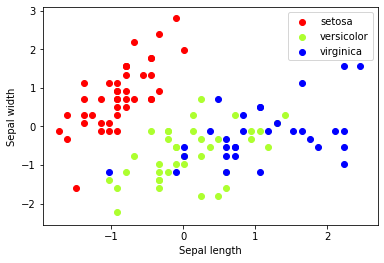

In [4]:
import matplotlib.pyplot as plt

colors = ['red', 'greenyellow', 'blue']
#it doesnt like "xrange" changed to "range"
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

print(plt)

In [5]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

#Note that the SGD classifer uses a random sampling algorithm and that was not controlled for.
#Thus my output will be different than the textbook. 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
print( clf.coef_)
#[[-28.53692691 15.05517618]
#[ -8.93789454 -8.13185613]
#[ 14.02830747 -12.80739966]]
print( clf.intercept_)
#[-17.62477802 -2.35658325 -9.7570213 ]

[[-24.98844678  13.19957427]
 [ -4.97941023 -10.57288373]
 [  2.67394645   1.07532684]]
[-13.25337715  -8.7752241   -5.10171759]


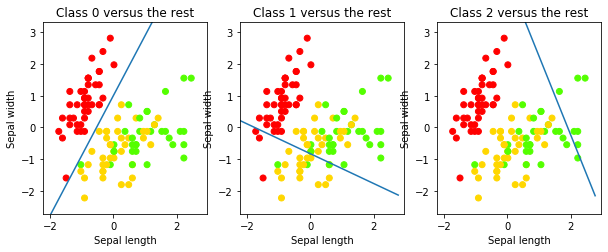

In [7]:
import numpy as np
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5

#error in case Xs or xs
Xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    
    #error here need plt.
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - Xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(Xs, ys)
    ## consufed whether it is Xs or xs

In [8]:
print( clf.predict(scaler.transform([[4.7, 3.1]])) )
#[0]

[0]


In [9]:
print( clf.decision_function(scaler.transform([[4.7, 3.1]])) )
#[[ 19.73905808 8.13288449 -28.63499119]]

[[19.33480796 -3.39692685 -8.3787053 ]]


In [10]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )
#0.821428571429
# 82% of the training set are correctly classified
# might cause overfitting

0.7857142857142857


In [11]:
y_pred = clf.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )
#0.684210526316
# 68% of the tesing dataset has been correctly classified

0.6578947368421053


In [12]:
print( metrics.classification_report(y_test, y_pred, target_names=iris.target_names) )
#precision recall f1-score support
#setosa 1.00 1.00 1.00 8
#versicolor 0.43 0.27 0.33 11
#virginica 0.65 0.79 0.71 19
#avg / total 0.66 0.68 0.66 38

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.33      0.18      0.24        11
   virginica       0.62      0.79      0.70        19

    accuracy                           0.66        38
   macro avg       0.65      0.66      0.64        38
weighted avg       0.62      0.66      0.63        38



In [13]:
print( metrics.confusion_matrix(y_test, y_pred) )
#[[ 8 0 0]
#[ 0 3 8]
#[ 0 4 15]]

[[ 8  0  0]
 [ 0  2  9]
 [ 0  4 15]]


In [14]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create a composite estimator made by a pipeline of the standarization and the linear model
clf = Pipeline([(
        'scaler', StandardScaler()),
        ('linear_model', SGDClassifier())
])
# create a k-fold cross validation iterator of k=5 folds
cv = KFold(5, shuffle=True, random_state=33)
# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(clf, X, y, cv=cv)
print( scores )
#[ 0.66666667 0.93333333 0.66666667 0.7 0.6 ]

[0.76666667 0.6        0.76666667 0.9        0.83333333]


In [15]:
from scipy.stats import sem
def mean_score(scores): return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print( mean_score(scores) )
#Mean score: 0.713 (+/-0.057)

Mean score: 0.773 (+/- 0.050)


In [16]:
print("My name is {Yaxuan Wang}")
print("My NetID is: {662869931}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Yaxuan Wang}
My NetID is: {662869931}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
